In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test_df=pd.read_csv('test.csv')

In [6]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

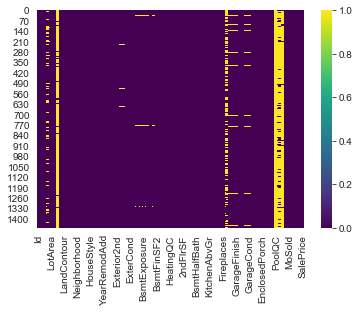

In [9]:
sns.heatmap(train_df.isnull(),cmap='viridis')

In [10]:
percent=[features for features in train_df.columns if train_df[features].isnull().sum()>1]

for feature in percent:
    print(feature, np.round(train_df[feature].isnull().mean(), 4),  ' % missing values')
    

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [11]:
train_df.drop(['Alley','MiscFeature','PoolQC','FireplaceQu'],axis=1,inplace=True)

In [12]:
train_df.drop('Fence',axis=1,inplace=True)

In [13]:
p=[features for features in test_df.columns if test_df[features].isnull().sum()>1]

for feature in p:
    print(feature, np.round(test_df[feature].isnull().mean(), 4),  ' % missing values')

MSZoning 0.0027  % missing values
LotFrontage 0.1556  % missing values
Alley 0.9267  % missing values
Utilities 0.0014  % missing values
MasVnrType 0.011  % missing values
MasVnrArea 0.0103  % missing values
BsmtQual 0.0302  % missing values
BsmtCond 0.0308  % missing values
BsmtExposure 0.0302  % missing values
BsmtFinType1 0.0288  % missing values
BsmtFinType2 0.0288  % missing values
BsmtFullBath 0.0014  % missing values
BsmtHalfBath 0.0014  % missing values
Functional 0.0014  % missing values
FireplaceQu 0.5003  % missing values
GarageType 0.0521  % missing values
GarageYrBlt 0.0535  % missing values
GarageFinish 0.0535  % missing values
GarageQual 0.0535  % missing values
GarageCond 0.0535  % missing values
PoolQC 0.9979  % missing values
Fence 0.8012  % missing values
MiscFeature 0.965  % missing values


In [14]:
test_df.drop(['Alley','MiscFeature','PoolQC','FireplaceQu','Fence'],axis=1,inplace=True)

In [15]:
train_df2=train_df.copy()

In [16]:
final_df=pd.concat([train_df,test_df],axis=0)

In [17]:
final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [18]:
categorical=[]
for i in final_df:
    if final_df[i].dtypes=='O':
        categorical.append(i)
    
print(categorical)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [19]:
c=[features for features in final_df.columns if final_df[features].isnull().sum()>1]

for feature in c:
    print(feature, np.round(final_df[feature].isnull().mean(), 4),  ' % missing values')

MSZoning 0.0014  % missing values
LotFrontage 0.1665  % missing values
Utilities 0.0007  % missing values
MasVnrType 0.0082  % missing values
MasVnrArea 0.0079  % missing values
BsmtQual 0.0277  % missing values
BsmtCond 0.0281  % missing values
BsmtExposure 0.0281  % missing values
BsmtFinType1 0.0271  % missing values
BsmtFinType2 0.0274  % missing values
BsmtFullBath 0.0007  % missing values
BsmtHalfBath 0.0007  % missing values
Functional 0.0007  % missing values
GarageType 0.0538  % missing values
GarageYrBlt 0.0545  % missing values
GarageFinish 0.0545  % missing values
GarageQual 0.0545  % missing values
GarageCond 0.0545  % missing values
SalePrice 0.4998  % missing values


In [20]:
final_df['LotFrontage']=final_df['LotFrontage'].fillna(final_df['LotFrontage'].mean())
final_df['MSZoning']=final_df['MSZoning'].fillna(final_df['MSZoning'].mode()[0])
final_df['BsmtQual']=final_df['BsmtQual'].fillna(final_df['BsmtQual'].mode()[0])
final_df['BsmtCond']=final_df['BsmtCond'].fillna(final_df['BsmtCond'].mode()[0])
final_df['BsmtExposure']=final_df['BsmtExposure'].fillna(final_df['BsmtExposure'].mode()[0])
final_df['BsmtFinType1']=final_df['BsmtFinType1'].fillna(final_df['BsmtFinType1'].mode()[0])
final_df['BsmtFinType2']=final_df['BsmtFinType2'].fillna(final_df['BsmtFinType2'].mode()[0])
final_df['GarageType']=final_df['GarageType'].fillna(final_df['GarageType'].mode()[0])
final_df['GarageYrBlt']=final_df['GarageYrBlt'].fillna(final_df['GarageYrBlt'].mode()[0])
final_df['GarageFinish']=final_df['GarageFinish'].fillna(final_df['GarageFinish'].mode()[0])
final_df['GarageQual']=final_df['GarageQual'].fillna(final_df['GarageQual'].mode()[0])
final_df['GarageCond']=final_df['GarageCond'].fillna(final_df['GarageCond'].mode()[0])
final_df['Utilities']=final_df['Utilities'].fillna(final_df['Utilities'].mode()[0])
final_df['MasVnrType']=final_df['MasVnrType'].fillna(final_df['MasVnrType'].mode()[0])
final_df['MasVnrArea']=final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].mean())
final_df['BsmtFullBath']=final_df['BsmtFullBath'].fillna(final_df['BsmtFullBath'].mean())
final_df['Functional']=final_df['Functional'].fillna(final_df['Functional'].mode()[0])
final_df['BsmtHalfBath']=final_df['BsmtHalfBath'].fillna(final_df['BsmtHalfBath'].mean())

In [21]:
c=[features for features in final_df.columns if final_df[features].isnull().sum()>1]

for feature in c:
    print(feature, np.round(final_df[feature].isnull().mean(), 4),  ' % missing values')

SalePrice 0.4998  % missing values


In [22]:
len(categorical)

38

In [23]:
df1=pd.get_dummies(final_df, columns=categorical)
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
#for i in df1:
    #if df1[i].dtypes=='O':
       # df1.drop([i],axis=1, inplace=True)
        
#df1.shape

(2919, 272)

In [34]:
df1=df1.iloc[:,~df1.columns.duplicated()]

In [35]:
df1.shape

(2919, 272)

In [25]:
#X_train=df_train.drop('SalePrice',axis=1)
#y_train=df_train['SalePrice']

In [26]:
#import xgboost

In [27]:
#model=xgboost.XGBRegressor()
#model.fit(X_train,y_train)

In [28]:
import pickle

In [29]:
#filename='finalised_model.pkl'
#pickle.dump(model,open(filename,'wb'))

In [30]:
#predictions=model.predict(df_test)

In [31]:
#predictions

In [32]:
#pred=pd.DataFrame(predictions)
#sub_df=pd.read_csv('sample_submission.csv')
#dataset=pd.concat([sub_df['Id'],pred],axis=1)
#dataset.columns=['Id','SalePrice']
#dataset.to_csv('sample_submission.csv',index=False)